In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
base_df = pd.read_feather('../features/kernel_mini_data/BASE_train.feather')
loop_df = pd.read_feather('../features/kernel_mini_data/LOOP_train.feather')

In [3]:
df = pd.concat([base_df,loop_df],axis=1)

In [4]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,small_quenstion,prior_question_elapsed_time_mean,ans_user_avg,elapsed_time_user_avg,explanation_user_avg,ans_content_avg,elapsed_time_content_avg,explanation_content_avg,lag_time_1,lag_time_2,lag_time_3,lag_incorrect_time,ans_tags1_avg,elapsed_time_tags1_avg,explanation_tags1_avg,ans_user_part_avg,lag_part_time_1,lag_part_time_2,lag_part_time_3,lag_part_incorrect_time,first_bundle,ans_user_part_count,user_content_count
0,46,0,124,7900,0,0,0,1,NaN,0,7900.0,0.0,1,131 93 81,131.0,93.0,81.0,NaN,NaN,NaN,NaN,None,NaN,0.0,25402.451226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7900.0,0,0
1,47,32683,124,7876,0,1,0,0,26000.0,0,7876.0,3.0,1,10 94 92,10.0,94.0,92.0,NaN,NaN,NaN,NaN,None,NaN,0.0,26000.000000,1.000000,NaN,0.0,NaN,NaN,NaN,32683.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,32683.0,NaN,NaN,NaN,7900.0,1,0
2,48,62000,124,175,0,2,2,1,29000.0,0,175.0,2.0,1,9 10 92,9.0,10.0,92.0,NaN,NaN,NaN,NaN,None,NaN,0.0,29000.000000,0.500000,NaN,0.0,NaN,NaN,NaN,29317.0,62000.0,NaN,29317.0,NaN,NaN,NaN,0.5,29317.0,62000.0,NaN,29317.0,7900.0,2,0
3,49,83632,124,1278,0,3,1,0,26000.0,0,1278.0,3.0,2,143 140 81 29,143.0,140.0,81.0,29.0,NaN,NaN,NaN,None,NaN,0.0,26000.000000,0.666667,NaN,0.0,NaN,NaN,NaN,21632.0,50949.0,83632.0,50949.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7900.0,0,0
4,50,189483,124,2064,0,4,2,0,18000.0,0,2063.0,1.0,3,157 92 29,157.0,92.0,29.0,NaN,NaN,NaN,NaN,None,NaN,1.0,18000.000000,0.500000,NaN,0.0,NaN,NaN,NaN,105851.0,127483.0,156800.0,105851.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7900.0,0,0


In [6]:
df['first_bundle'].isnull().sum()

0

In [8]:
df[(df['user_id'] == 124) & (df['bundle_id'] == 7216.0)]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,small_quenstion,prior_question_elapsed_time_mean,ans_user_avg,elapsed_time_user_avg,explanation_user_avg,ans_content_avg,elapsed_time_content_avg,explanation_content_avg,lag_time_1,lag_time_2,lag_time_3,lag_incorrect_time,ans_tags1_avg,elapsed_time_tags1_avg,explanation_tags1_avg,ans_user_part_avg,lag_part_time_1,lag_part_time_2,lag_part_time_3,lag_part_incorrect_time,first_bundle,ans_user_part_count,user_content_count
26,72,571323,124,7218,0,15,3,0,6500.0,0,7216.0,2.0,7,50 18 21,50.0,18.0,21.0,NaN,NaN,NaN,NaN,None,NaN,2.0,6500.0,0.269231,NaN,0.0,NaN,NaN,NaN,16819.0,16819.0,16819.0,16819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7900.0,0,0
27,73,571323,124,7216,0,15,0,0,6500.0,0,7216.0,3.0,7,97 50 21,97.0,50.0,21.0,NaN,NaN,NaN,NaN,None,NaN,0.0,6500.0,0.259259,NaN,0.0,NaN,NaN,NaN,0.0,16819.0,16819.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,7900.0,1,0
28,74,571323,124,7217,0,15,3,0,6500.0,0,7216.0,2.0,7,50 118 21,50.0,118.0,21.0,NaN,NaN,NaN,NaN,None,NaN,1.0,6500.0,0.250000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,16819.0,0.0,0.0,6500.0,0.0,0.0,0.0,0.0,NaN,0.0,7900.0,2,0
29,75,571323,124,7219,0,15,1,0,6500.0,0,7216.0,2.0,7,50 19 21,50.0,19.0,21.0,NaN,NaN,NaN,NaN,None,NaN,3.0,6500.0,0.241379,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,6500.0,0.0,0.0,0.0,0.0,0.0,0.0,7900.0,3,0


In [58]:
base_df2 = pd.read_feather('../features/kernel_mini_data/BASE_train.feather')
loop_df2 = pd.read_feather('../features/kernel_mini_data/LOOP_train.feather')

In [59]:
df2 = pd.concat([base_df2,loop_df2],axis=1)

In [60]:
df2[(df2['user_id'] == 124) & (df2['bundle_id'] == 7216)][['user_id','ans_user_avg','answered_correctly','bundle_id']]

,user_id,ans_user_avg,answered_correctly,bundle_id
26,124,0.258065,0,7216.0
27,124,0.258065,0,7216.0
28,124,0.258065,0,7216.0
29,124,0.258065,0,7216.0


In [52]:
df2.iloc[63208:63212][['user_id','ans_user_avg','answered_correctly']]

,user_id,ans_user_avg,answered_correctly
63208,4288302,0.500000,1
63209,4288302,0.600000,0
63210,4288302,0.600000,1
63211,4288302,0.571429,0


In [46]:
df2[(df2['user_id'] == 124)][['ans_user_avg','answered_correctly']].head(10)

,ans_user_avg,answered_correctly
0,NaN,1
1,1.000000,0
2,0.500000,1
3,0.666667,0
4,0.500000,0
5,0.400000,0
6,0.400000,1
7,0.428571,0
8,0.375000,0
9,0.375000,0


In [36]:
df[(df['user_id'] == 124) & (df['bundle_id'] == 7216.0)]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,small_quenstion,prior_question_elapsed_time_mean,ans_user_avg,elapsed_time_user_avg,explanation_user_avg,ans_content_avg,elapsed_time_content_avg,explanation_content_avg,lag_time_1,lag_time_2,lag_time_3,lag_incorrect_time,ans_tags1_avg,elapsed_time_tags1_avg,explanation_tags1_avg,ans_user_part_avg,lag_part_time_1,lag_part_time_2,lag_part_time_3,lag_part_incorrect_time,first_bundle,ans_user_part_count,user_content_count
26,72,571323,124,7218,0,15,3,0,6500.0,0,7216.0,2.0,7,50 18 21,50.0,18.0,21.0,NaN,NaN,NaN,NaN,None,NaN,2.0,6500.0,0.269231,NaN,0.0,NaN,NaN,NaN,16819.0,16819.0,16819.0,16819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7900.0,0,0
27,73,571323,124,7216,0,15,0,0,6500.0,0,7216.0,3.0,7,97 50 21,97.0,50.0,21.0,NaN,NaN,NaN,NaN,None,NaN,0.0,6500.0,0.259259,NaN,0.0,NaN,NaN,NaN,0.0,16819.0,16819.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,7900.0,1,0
28,74,571323,124,7217,0,15,3,0,6500.0,0,7216.0,2.0,7,50 118 21,50.0,118.0,21.0,NaN,NaN,NaN,NaN,None,NaN,1.0,6500.0,0.250000,NaN,0.0,NaN,NaN,NaN,0.0,0.0,16819.0,0.0,0.0,6500.0,0.0,0.0,0.0,0.0,NaN,0.0,7900.0,2,0
29,75,571323,124,7219,0,15,1,0,6500.0,0,7216.0,2.0,7,50 19 21,50.0,19.0,21.0,NaN,NaN,NaN,NaN,None,NaN,3.0,6500.0,0.241379,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,6500.0,0.0,0.0,0.0,0.0,0.0,0.0,7900.0,3,0


In [61]:
df2.columns

Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation',
       'bundle_id', 'correct_answer', 'part', 'tags', 'tags1', 'tags2',
       'tags3', 'tags4', 'tags5', 'tags6', 'tag', 'type_of', 'l_type_of',
       'small_quenstion', 'prior_question_elapsed_time_mean', 'ans_user_avg',
       'elapsed_time_user_avg', 'explanation_user_avg', 'ans_content_avg',
       'elapsed_time_content_avg', 'explanation_content_avg', 'lag_time_1',
       'lag_time_2', 'lag_time_3', 'lag_incorrect_time', 'ans_tags1_avg',
       'elapsed_time_tags1_avg', 'explanation_tags1_avg', 'ans_user_part_avg',
       'lag_part_time_1', 'lag_part_time_2', 'lag_part_time_3',
       'lag_part_incorrect_time', 'first_bundle', 'ans_user_part_count',
       'user_content_count'],
      dtype='object')

In [32]:
for a,b in qs_train[:10000].groupby(['user_id','bundle_id']):
    a
    b
    if len(b) > 1:
        break

In [33]:
b

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community
40,40,667971812,115,2065,0,40,2,1,17000.0,False,2063,2,3,136 162 92 29,136,162,92,29,None,None,2
41,41,667971812,115,2064,0,40,1,1,17000.0,False,2063,1,3,157 92 29,157,92,29,None,None,None,2
42,42,667971812,115,2063,0,40,3,0,17000.0,False,2063,0,3,136 92 29,136,92,29,None,None,None,2


In [13]:
train_df = pd.read_feather('../data/input/train.feather')

In [23]:
def _reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [24]:
def _label_encoder(data):
    l_data,_ =data.factorize(sort=True)
    if l_data.max()>32000:
        l_data = l_data.astype('int32')
    else:
        l_data = l_data.astype('int16')

    if data.isnull().sum() > 0:
        l_data = np.where(l_data == -1,np.nan,l_data)
    return l_data

In [25]:
train_df = _reduce_mem_usage(train_df)

Mem. usage decreased to 3378.93 Mb (56.2% reduction)


In [26]:
qs = pd.read_csv('../data/input/questions.csv')
qs_cmnts = pd.read_csv('../data/input/question_cmnts.csv')

In [27]:
lc = pd.read_csv('../data/input/lectures_new.csv')

In [28]:
tag = qs["tags"].str.split(" ",expand = True)
tag.columns = ['tags1','tags2','tags3','tags4','tags5','tags6']
qs = pd.concat([qs,tag],axis=1)
qs = pd.merge(qs,qs_cmnts,on='question_id',how='left')
lc['l_type_of'] = _label_encoder(lc['type_of'])
qs = qs.rename(columns={'question_id':'content_id'})
lc = lc.rename(columns={'lecture_id':'content_id'})

In [29]:
qs_train = train_df[train_df['content_type_id'] == 0]
# lc_train = train_df[train_df['content_type_id'] == 1]
qs_train = pd.merge(qs_train,qs,on='content_id',how='left')
# lc_train = pd.merge(lc_train,lc,on='content_id',how='left')

In [42]:
rows = []
for num, row in enumerate(tqdm(qs_train[['user_id', 'answered_correctly', 'content_id',
                                           'prior_question_elapsed_time', 'prior_question_had_explanation', 'timestamp',
                                           'tags1','part','bundle_id']][:10].values)):
    rows.append(row)

100%|██████████| 10/10 [00:00<00:00, 108660.73it/s]


In [44]:
for row in rows:
    row

In [45]:
row

array([115, 1, 7863, 16000.0, False, 230983, '131', 1, 7863], dtype=object)

In [19]:
del train_df

In [20]:
qs_train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community
0,0,0,115,5692,0,1,3,1,NaN,None,5692,3,5,151,151,None,None,None,None,None,0
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,2,5,168,168,None,None,None,None,None,0
2,2,118363,115,128,0,0,0,1,55000.0,False,128,0,1,131 149 92,131,149,92,None,None,None,2
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,0,1,131 104 81,131,104,81,None,None,None,2
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,1,1,131 149 92,131,149,92,None,None,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99271295,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True,3586,0,5,8,8,None,None,None,None,None,1
99271296,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True,6341,3,5,60,60,None,None,None,None,None,1
99271297,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True,4212,3,5,95,95,None,None,None,None,None,0
99271298,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True,6343,0,5,60,60,None,None,None,None,None,1


In [38]:
qs_train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community
0,0,0,115,5692,0,1,3,1,NaN,None,5692,3,5,151,151,None,None,None,None,None,0
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,2,5,168,168,None,None,None,None,None,0
2,2,118363,115,128,0,0,0,1,55000.0,False,128,0,1,131 149 92,131,149,92,None,None,None,2
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,0,1,131 104 81,131,104,81,None,None,None,2
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,1,1,131 149 92,131,149,92,None,None,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99271295,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True,3586,0,5,8,8,None,None,None,None,None,1
99271296,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True,6341,3,5,60,60,None,None,None,None,None,1
99271297,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True,4212,3,5,95,95,None,None,None,None,None,0
99271298,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True,6343,0,5,60,60,None,None,None,None,None,1


In [34]:
test  = pd.read_csv('../data/input/example_test.csv')

In [36]:
qs_test = test[test['content_type_id'] == 0]
qs_test = pd.merge(qs_test,qs,on='content_id',how='left')

In [37]:
qs_test[qs_test['user_id'] == 1096784725]

,row_id,group_num,timestamp,user_id,content_id,content_type_id,task_container_id,prior_question_elapsed_time,prior_question_had_explanation,prior_group_answers_correct,prior_group_responses,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,community
11,11,0,2153839851,1096784725,11033,0,315,34250.0,True,NaN,NaN,11031,3,6,91,91,None,None,None,None,None,1
12,12,0,2153839851,1096784725,11032,0,315,34250.0,True,NaN,NaN,11031,1,6,27,27,None,None,None,None,None,1
13,13,0,2153839851,1096784725,11034,0,315,34250.0,True,NaN,NaN,11031,2,6,179,179,None,None,None,None,None,1
14,14,0,2153839851,1096784725,11031,0,315,34250.0,True,NaN,NaN,11031,1,6,43,43,None,None,None,None,None,0


In [27]:
test['user_id'].value_counts()

1310228392    5
775113212     4
319060572     4
1317245193    4
1357500007    4
1096784725    4
275030867     4
288641214     4
1202386221    4
2018567473    3
2103436554    3
555691277     3
674533997     3
311890082     3
1422853669    3
998511398     3
1900527744    3
554169193     3
1233875513    3
1468996389    3
1981166446    3
2030979309    3
1637273633    2
1364159702    2
385471210     2
891955351     2
1720860329    2
98059812      2
1521618396    2
1728340777    2
1219481379    1
1281335472    1
706626847     1
1148874033    1
1817433235    1
2002570769    1
1838324752    1
2093197291    1
1700555100    1
1599808246    1
7792299       1
1305988022    1
Name: user_id, dtype: int64

In [14]:
qs_train[qs_train['bundle_id'] == 7900].head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6
13,13,328686,115,7900,0,13,0,1,21000.0,False,7900,0,1,131 93 81,131,93,81,None,None,None
46,46,0,124,7900,0,0,0,1,NaN,None,7900,0,1,131 93 81,131,93,81,None,None,None
1854,1874,0,24418,7900,0,0,2,0,NaN,None,7900,0,1,131 93 81,131,93,81,None,None,None
4201,4313,6214625797,24418,7900,0,1964,0,1,23000.0,True,7900,0,1,131 93 81,131,93,81,None,None,None
8137,8338,0,24600,7900,0,0,0,1,NaN,None,7900,0,1,131 93 81,131,93,81,None,None,None


In [23]:
qs_train[~qs_train.duplicated(subset=['user_id'],keep='first')]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6
0,0,0,115,5692,0,1,3,1,NaN,None,5692,3,5,151,151,None,None,None,None,None
46,46,0,124,7900,0,0,0,1,NaN,None,7900,0,1,131 93 81,131,93,81,None,None,None
76,76,0,2746,5273,0,0,1,0,NaN,None,5273,3,5,45,45,None,None,None,None,None
95,96,0,5382,5000,0,0,0,1,NaN,None,5000,0,5,26,26,None,None,None,None,None
220,224,0,8623,3915,0,0,3,1,NaN,None,3915,3,5,96,96,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99269970,101228989,0,2147470770,7900,0,0,0,1,NaN,None,7900,0,1,131 93 81,131,93,81,None,None,None
99270196,101229217,0,2147470777,7900,0,0,2,0,NaN,None,7900,0,1,131 93 81,131,93,81,None,None,None
99270948,101229975,0,2147481750,4137,0,0,0,0,NaN,None,4137,1,5,89,89,None,None,None,None,None
99270998,101230025,0,2147482216,3748,0,0,1,0,NaN,None,3748,0,5,152,152,None,None,None,None,None


In [24]:
qs_train[qs_train['user_id'] == 124]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6
46,46,0,124,7900,0,0,0,1,NaN,None,7900,0,1,131 93 81,131,93,81,None,None,None
47,47,32683,124,7876,0,1,0,0,26000.0,False,7876,3,1,10 94 92,10,94,92,None,None,None
48,48,62000,124,175,0,2,2,1,29000.0,False,175,2,1,9 10 92,9,10,92,None,None,None
49,49,83632,124,1278,0,3,1,0,26000.0,False,1278,3,2,143 140 81 29,143,140,81,29,None,None
50,50,189483,124,2064,0,4,2,0,18000.0,False,2063,1,3,157 92 29,157,92,29,None,None,None
51,51,189483,124,2063,0,4,3,0,18000.0,False,2063,0,3,136 92 29,136,92,29,None,None,None
52,52,189483,124,2065,0,4,2,1,18000.0,False,2063,2,3,136 162 92 29,136,162,92,29,None,None
53,53,258793,124,3364,0,5,2,0,33333.0,False,3363,1,4,136 103 29,136,103,29,None,None,None
54,54,258793,124,3365,0,5,3,0,33333.0,False,3363,2,4,136 103 29,136,103,29,None,None,None
55,55,258793,124,3363,0,5,0,0,33333.0,False,3363,3,4,74 103 29,74,103,29,None,None,None


In [26]:
qs_train[qs_train['user_id'] == 2147470770].head(15)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6
99269970,101228989,0,2147470770,7900,0,0,0,1,NaN,None,7900,0,1,131 93 81,131,93,81,None,None,None
99269971,101228990,25201,2147470770,7876,0,1,3,1,21000.0,False,7876,3,1,10 94 92,10,94,92,None,None,None
99269972,101228991,53196,2147470770,175,0,2,2,1,22000.0,False,175,2,1,9 10 92,9,10,92,None,None,None
99269973,101228992,71389,2147470770,1278,0,3,3,1,26000.0,False,1278,3,2,143 140 81 29,143,140,81,29,None,None
99269974,101228993,149366,2147470770,2064,0,4,1,1,16000.0,False,2063,1,3,157 92 29,157,92,29,None,None,None
99269975,101228994,149366,2147470770,2065,0,4,2,1,16000.0,False,2063,2,3,136 162 92 29,136,162,92,29,None,None
99269976,101228995,149366,2147470770,2063,0,4,1,0,16000.0,False,2063,0,3,136 92 29,136,92,29,None,None,None
99269977,101228996,226179,2147470770,3363,0,5,1,0,24666.0,False,3363,3,4,74 103 29,74,103,29,None,None,None
99269978,101228997,226179,2147470770,3364,0,5,0,0,24666.0,False,3363,1,4,136 103 29,136,103,29,None,None,None
99269979,101228998,226179,2147470770,3365,0,5,0,0,24666.0,False,3363,2,4,136 103 29,136,103,29,None,None,None


In [19]:
qs_train[~qs_train.duplicated(subset=['user_id'],keep='first')]['bundle_id'].value_counts()

7900    150587
128      14213
5692      3220
7876       212
2063       191
         ...  
2099         1
8089         1
7966         1
411          1
1949         1
Name: bundle_id, Length: 4536, dtype: int64

In [22]:
qs_train[~qs_train.duplicated(subset=['user_id'],keep='first')]['bundle_id'].value_counts()[:30]

7900    150587
128      14213
5692      3220
7876       212
2063       191
3363       170
1278       154
175        124
1232       119
4987       107
4528       106
6177       102
6117       102
4555       102
4226       101
4975       101
5421       100
4936        99
4948        99
8243        99
2946        99
4121        99
4150        98
5105        98
6217        98
5188        98
5675        98
5619        98
6431        98
3605        98
Name: bundle_id, dtype: int64

In [10]:
train_df = pd.concat([qs_train,lc_train])
train_df = train_df.sort_values('row_id')

In [11]:
train_df= train_df.reset_index(drop=True)

In [12]:
content_num = pd.DataFrame(train_df['content_id'].value_counts().sort_values(ascending=False)).reset_index()
content_num.columns = ['content_id','content_num']

In [31]:
train_df_t = train_df[train_df['user_answer'] != -1]

(array([19848982., 10657130., 10278582., 13756854., 14678127., 10694781.,
         7434706.,  8559459.,  2795045.,   567634.]),
 array([    0. ,  1352.2,  2704.4,  4056.6,  5408.8,  6761. ,  8113.2,
         9465.4, 10817.6, 12169.8, 13522. ]),
 <a list of 10 Patch objects>)

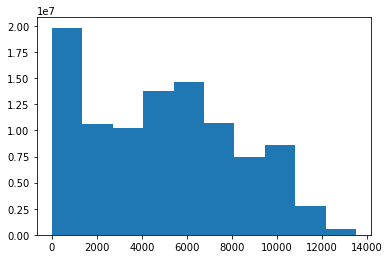

In [32]:
plt.hist(train_df_t['content_id'])

In [28]:
32736/500

65.472

In [33]:
train_df_t['content_id_cut'] = train_df_t['content_id']/100
train_df_t['content_id_cut'] = train_df_t['content_id_cut'].astype(int)
# for i in range(100):
#     train_df_t.loc[train_df[''],'content_id_cut'] = i

/home/zakopuro/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/zakopuro/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
train_df_t['bundle_id_cut'] = train_df_t['bundle_id']/100
train_df_t['bundle_id_cut'] = train_df_t['bundle_id_cut'].astype(int)

/home/zakopuro/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/zakopuro/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
train_df_t[train_df_t['content_id_cut'] != train_df_t['bundle_id_cut']]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,cintent_id_cut,content_id_cut,bundle_id_cut
522,522,3693635077,12741,7400,0,74,3,0,36750.0,True,7396.0,1.0,7,145 160 16 35 122,145,160,16,35,122,None,NaN,NaN,NaN,22,74,73
577,577,4461666848,12741,10700,0,94,2,0,31666.0,True,10698.0,0.0,4,82 81 3,82,81,3,None,None,None,NaN,NaN,NaN,32,107,106
1138,1138,15285968150,13134,3101,0,428,3,0,27333.0,True,3099.0,1.0,4,82 169 29,82,169,29,None,None,None,NaN,NaN,NaN,9,31,30
1139,1139,15285968150,13134,3100,0,428,0,1,27333.0,True,3099.0,0.0,4,136 169 29,136,169,29,None,None,None,NaN,NaN,NaN,9,31,30
1464,1464,16570064483,13134,2600,0,698,0,0,23666.0,True,2599.0,1.0,4,106 12 81,106,12,81,None,None,None,NaN,NaN,NaN,7,26,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101228974,101228974,2515198787,2147469944,10700,0,169,2,0,19666.0,True,10698.0,0.0,4,82 81 3,82,81,3,None,None,None,NaN,NaN,NaN,32,107,106
101229349,101229349,9018432870,2147470777,2900,0,99,0,1,15666.0,True,2898.0,0.0,4,82 120 162 92,82,120,162,92,None,None,NaN,NaN,NaN,8,29,28
101229376,101229376,9283802708,2147470777,1800,0,111,0,1,17333.0,True,1799.0,0.0,3,74 81 92,74,81,92,None,None,None,NaN,NaN,NaN,5,18,17
101229377,101229377,9283802708,2147470777,1801,0,111,3,0,17333.0,True,1799.0,2.0,3,82 81 92,82,81,92,None,None,None,NaN,NaN,NaN,5,18,17


In [30]:
train_df_t

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,cintent_id_cut,content_id_cut
89,89,653762,2746,6808,1,14,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,intention,1.0,20,13
117,117,10183847,5382,16736,1,21,-1,-1,NaN,False,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,concept,0.0,51,33
212,212,1424348597,5382,30207,1,104,-1,-1,NaN,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,concept,0.0,92,60
216,216,1425557777,5382,18545,1,121,-1,-1,NaN,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,concept,0.0,56,37
295,295,405813029,8623,10540,1,59,-1,-1,NaN,False,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,concept,0.0,32,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101230063,101230063,132157858,2147482216,14325,1,38,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,intention,1.0,43,28
101230195,101230195,1073593458,2147482216,21887,1,170,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,concept,0.0,66,43
101230218,101230218,1240316256,2147482216,6808,1,193,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,intention,1.0,20,13
101230220,101230220,1240470616,2147482216,27699,1,195,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,intention,1.0,84,55


In [26]:
train_df_t['content_id'].max()

32736

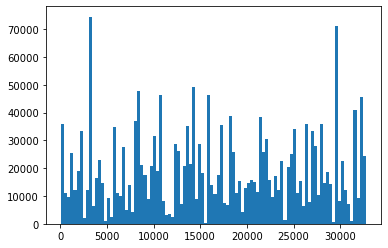

In [25]:
plt.hist(train_df_t['content_id'],bins=100)
plt.show()

In [21]:
train_df['cintent_id_cut'] = pd.cut(train_df['content_id'],100,labels=False)

In [23]:
train_df[train_df['cintent_id_cut'] == 89]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,cintent_id_cut
7086,7086,10610710097,24418,29171,1,3986,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,solving question,2.0,89
290265,290265,15704532080,5401739,29171,1,3768,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,solving question,2.0,89
355062,355062,5805010582,6935697,29171,1,1325,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,solving question,2.0,89
480681,480681,8292457737,9388809,29171,1,1675,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,solving question,2.0,89
852266,852266,9053451080,17771134,29171,1,1895,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,solving question,2.0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100159020,100159020,7682262824,2125972291,29171,1,2925,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,solving question,2.0,89
100176122,100176122,5058593204,2126450600,29171,1,773,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,solving question,2.0,89
100191480,100191480,7177515855,2126522966,29171,1,1519,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,solving question,2.0,89
100219766,100219766,29242876676,2127040843,29171,1,5616,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,solving question,2.0,89


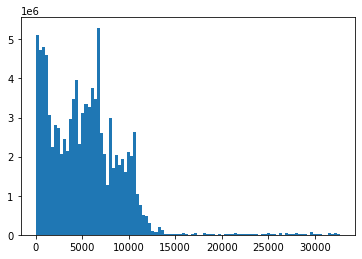

In [18]:
plt.hist(train_df['content_id'],bins=100)
plt.show()

In [30]:
train_df[train_df['content_id'] == 1485]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
16028212,16028212,2677057424,343784114,1485,0,5348,2,0,1333.0,True,1484.0,0.0,3,136 38 29,136,38,29,None,None,None,NaN,NaN,NaN


In [27]:
content_num[content_num['content_num'] == 1]

,content_id,content_num
13771,10007,1
13772,10006,1
13773,1485,1
13774,10008,1
13775,10005,1
13776,1484,1
13777,14429,1
13778,5823,1
13779,10033,1
13780,1486,1


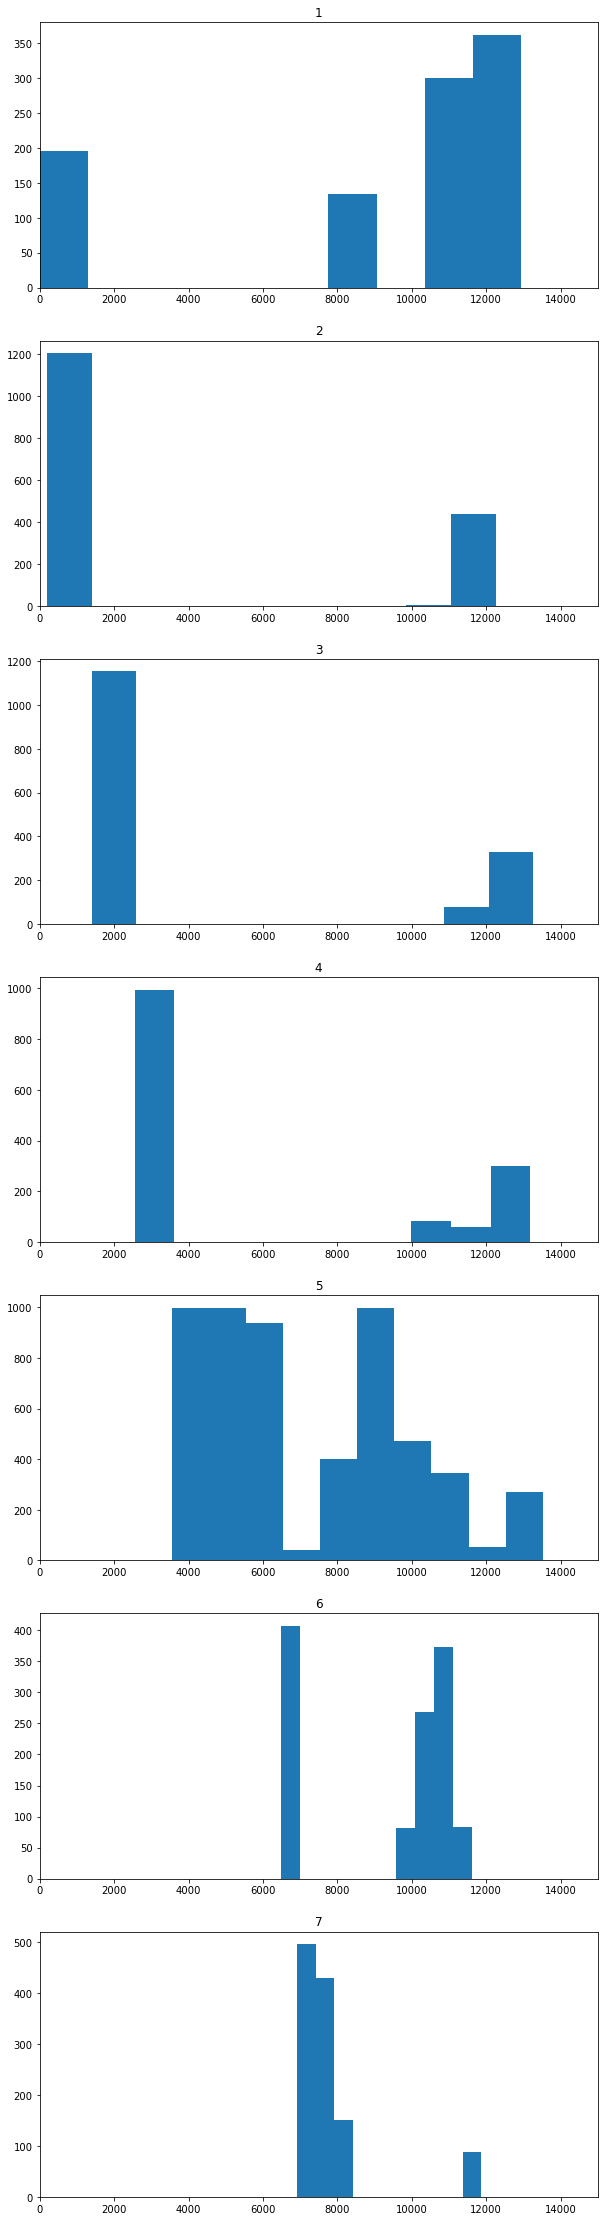

In [16]:
plt.figure(figsize=(10,40))
for part in range(1,8):
    plt.subplot(7,1,part)
    plt.title(part)
    plt.hist(qs[qs['part'] == part]['content_id'])
    plt.xlim(0,15000)
plt.show()

In [24]:
lc[lc['content_id'] == 7926]

,content_id,tag,part,type_of,l_type_of
87,7926,57,5,concept,0


In [25]:
qs[qs['content_id'] == 7926]

,content_id,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6
7926,7926,7926,1,1,9 10 92,9,10,92,None,None,None


In [26]:
train_df[(train_df['content_type_id'] == 1) & (train_df['content_id'] == 7926)]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
2792,2731,4578814516,24418,7926,1,780,-1,-1,NaN,False,7928.0,1.0,1,9 10 92,9,10,92,None,None,None,NaN,NaN,NaN
2793,2731,4578814516,24418,7926,1,780,-1,-1,NaN,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,concept,0.0
9857,9644,1551484585,91216,7926,1,445,-1,-1,NaN,False,7928.0,1.0,1,9 10 92,9,10,92,None,None,None,NaN,NaN,NaN
9858,9644,1551484585,91216,7926,1,445,-1,-1,NaN,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,concept,0.0
24054,23592,167768109,385630,7926,1,60,-1,-1,NaN,False,7928.0,1.0,1,9 10 92,9,10,92,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103287853,101217176,5259468852,2147143229,7926,1,169,-1,-1,NaN,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,concept,0.0
103290027,101219301,2872416680,2147190658,7926,1,161,-1,-1,NaN,False,7928.0,1.0,1,9 10 92,9,10,92,None,None,None,NaN,NaN,NaN
103290028,101219301,2872416680,2147190658,7926,1,161,-1,-1,NaN,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,concept,0.0
103292403,101221636,3034533359,2147236006,7926,1,331,-1,-1,NaN,False,7928.0,1.0,1,9 10 92,9,10,92,None,None,None,NaN,NaN,NaN


In [23]:
train_df[(train_df['content_type_id'] == 0) & (~train_df['l_type_of'].isnull())]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
19,18,437272,115,7926,0,18,1,1,18000.0,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,concept,0.0
25,23,557677,115,185,0,23,3,0,21000.0,False,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,concept,0.0
33,30,710402,115,100,0,30,0,1,20000.0,False,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,concept,0.0
100,95,835457,2746,484,0,19,0,1,20000.0,True,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,concept,0.0
118,112,5355233,5382,185,0,16,0,1,34000.0,True,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,concept,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103300974,101230036,568985,2147482216,10688,0,11,1,0,17000.0,True,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,concept,0.0
103301050,101230111,610724171,2147482216,4100,0,86,0,1,20000.0,True,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,solving question,2.0
103301134,101230194,1073354256,2147482216,641,0,169,3,1,17000.0,True,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,solving question,2.0
103301208,101230265,1416460250,2147482216,5120,0,240,0,1,17000.0,True,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177.0,solving question,2.0


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
19,18,437272,115,7926,0,18,1,1,18000.0,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,concept,0.0
25,23,557677,115,185,0,23,3,0,21000.0,False,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,concept,0.0
33,30,710402,115,100,0,30,0,1,20000.0,False,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,concept,0.0
100,95,835457,2746,484,0,19,0,1,20000.0,True,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,concept,0.0
118,112,5355233,5382,185,0,16,0,1,34000.0,True,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,concept,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103300974,101230036,568985,2147482216,10688,0,11,1,0,17000.0,True,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,concept,0.0
103301050,101230111,610724171,2147482216,4100,0,86,0,1,20000.0,True,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,solving question,2.0
103301134,101230194,1073354256,2147482216,641,0,169,3,1,17000.0,True,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,solving question,2.0
103301208,101230265,1416460250,2147482216,5120,0,240,0,1,17000.0,True,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177.0,solving question,2.0


In [9]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
0,0,0,115,5692,0,1,3,1,NaN,None,5692.0,3.0,5,151,151,None,None,None,None,None,NaN,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716.0,2.0,5,168,168,None,None,None,None,None,NaN,NaN,NaN
2,2,118363,115,128,0,0,0,1,55000.0,False,128.0,0.0,1,131 149 92,131,149,92,None,None,None,NaN,NaN,NaN
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860.0,0.0,1,131 104 81,131,104,81,None,None,None,NaN,NaN,NaN
4,4,137965,115,7922,0,4,1,1,11000.0,False,7920.0,1.0,1,131 149 92,131,149,92,None,None,None,NaN,NaN,NaN


In [22]:
train_df['time_sec'] = train_df['timestamp'] * 1000

In [29]:
train_df['days_elapsed'] = train_df['timestamp']/(1000*3600*24)
train_df['days_elapsed'] = train_df['days_elapsed'].astype(int)

In [35]:
train_df[train_df['days_elapsed'] == 0]['user_id'].value_counts()

7171715       8079
1206846864    2877
477605950     1838
1955854307    1459
1828242828    1382
              ... 
1132872878       1
1898344621       1
450935988        1
1631954147       1
1007126411       1
Name: user_id, Length: 393656, dtype: int64

In [65]:
train_df_t = train_df[train_df['content_type_id'] == 0]

In [43]:
user_num_day0 = pd.DataFrame(train_df[train_df['days_elapsed'] == 0]['user_id'].value_counts().sort_values(ascending=False)).reset_index()

In [48]:
user_num_day = pd.DataFrame(train_df_t[train_df_t['days_elapsed'] >= 1].value_counts(['user_id','days_elapsed']).sort_values(ascending=False)).reset_index()

In [53]:
# train_df[train_df['user_id'] == 115]

In [66]:
train_df['count'] = 1
df = train_df_t[train_df_t['days_elapsed'] >= 1].groupby(['user_id','days_elapsed'])['count'].agg(['count'])

In [67]:
df = df.reset_index()

In [72]:
df.head()

,user_id,days_elapsed,count
0,115,7,7
1,5382,1,1
2,5382,2,8
3,5382,3,24
4,5382,4,37


In [70]:
train_df_t[(train_df_t['user_id'].isin(df[df['count'] > 100]['user_id'].unique()))]['user_id'].value_counts()

801103753     17824
1478712595    17047
455973631     16852
1842816145    16718
1743444187    16617
              ...  
1798352104      108
174820259       108
128378868       108
810639307       107
2010838628      106
Name: user_id, Length: 37338, dtype: int64

In [71]:
train_df[train_df['user_id'] == 2010838628]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,time,days_elapsed,count
96666943,94728643,0,2010838628,7900,0,0,0,1,NaN,None,7900.0,0.0,1,131 93 81,131,93,81,None,None,None,NaN,NaN,NaN,0.000000,0,1
96666944,94728644,25084,2010838628,7876,0,1,3,1,17000.0,False,7876.0,3.0,1,10 94 92,10,94,92,None,None,None,NaN,NaN,NaN,0.006968,0,1
96666945,94728645,56882,2010838628,175,0,2,3,0,22000.0,False,175.0,2.0,1,9 10 92,9,10,92,None,None,None,NaN,NaN,NaN,0.015801,0,1
96666946,94728646,78022,2010838628,1278,0,3,3,1,29000.0,False,1278.0,3.0,2,143 140 81 29,143,140,81,29,None,None,NaN,NaN,NaN,0.021673,0,1
96666947,94728647,182924064,2010838628,2065,0,4,2,1,18000.0,False,2064.0,2.0,3,136 162 92 29,136,162,92,29,None,None,NaN,NaN,NaN,50.812240,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96667044,94728744,226911540,2010838628,8325,0,87,3,1,98000.0,True,8328.0,3.0,5,53,53,None,None,None,None,None,NaN,NaN,NaN,63.030983,2,1
96667045,94728745,226962734,2010838628,5673,0,88,1,0,13000.0,True,5672.0,0.0,5,47,47,None,None,None,None,None,NaN,NaN,NaN,63.045204,2,1
96667046,94728746,227079351,2010838628,4464,0,89,1,0,36000.0,True,4464.0,0.0,5,180,180,None,None,None,None,None,NaN,NaN,NaN,63.077598,2,1
96667047,94728747,227101966,2010838628,4244,0,90,3,1,97000.0,True,4244.0,3.0,5,170,170,None,None,None,None,None,NaN,NaN,NaN,63.083879,2,1


In [45]:
user_num_day1['user_id'].value_counts()

10     10620
20      5733
21      3999
1       3687
11      3101
       ...  
538        1
410        1
729        1
665        1
862        1
Name: user_id, Length: 507, dtype: int64

In [46]:
user_num_day0['user_id'].value_counts()

30     77342
7      20976
17     18740
40     15356
11     10526
       ...  
407        1
565        1
563        1
668        1
767        1
Name: user_id, Length: 618, dtype: int64

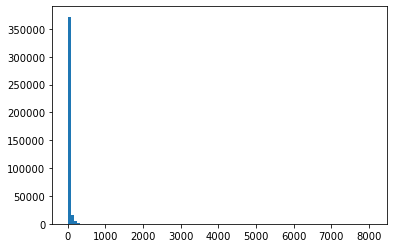

In [40]:
plt.hist(user_num_day0['user_id'],bins=100)
plt.show()

In [34]:
train_df['days_elapsed'].max()

1011

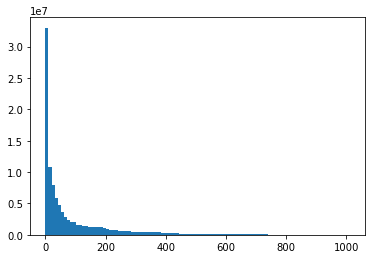

In [33]:
plt.hist(train_df['days_elapsed'],bins=100)
plt.show()

In [25]:
train_df

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,time,days_elapsed
0,0,0,115,5692,0,1,3,1,NaN,None,5692.0,3.0,5,151,151,None,None,None,None,None,NaN,NaN,NaN,0.000000,0
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716.0,2.0,5,168,168,None,None,None,None,None,NaN,NaN,NaN,0.015818,0
2,2,118363,115,128,0,0,0,1,55000.0,False,128.0,0.0,1,131 149 92,131,149,92,None,None,None,NaN,NaN,NaN,0.032879,0
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860.0,0.0,1,131 104 81,131,104,81,None,None,None,NaN,NaN,NaN,0.036435,0
4,4,137965,115,7922,0,4,1,1,11000.0,False,7920.0,1.0,1,131 149 92,131,149,92,None,None,None,NaN,NaN,NaN,0.038324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103301271,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True,3586.0,0.0,5,8,8,None,None,None,None,None,NaN,NaN,NaN,119.045672,119
103301272,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True,6340.0,3.0,5,60,60,None,None,None,None,None,NaN,NaN,NaN,119.051389,119
103301273,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True,4212.0,3.0,5,95,95,None,None,None,None,None,NaN,NaN,NaN,119.059299,119
103301274,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True,6344.0,0.0,5,60,60,None,None,None,None,None,NaN,NaN,NaN,119.069279,119


In [21]:
train_df[train_df['user_id'] == 455973631][:]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
21665642,21228163,0,455973631,7900,0,0,2,0,NaN,None,7900.0,0.0,1,131 93 81,131,93,81,None,None,None,NaN,NaN,NaN
21665643,21228164,21487,455973631,7876,0,1,3,1,25000.0,False,7876.0,3.0,1,10 94 92,10,94,92,None,None,None,NaN,NaN,NaN
21665644,21228165,44108,455973631,175,0,2,3,0,18000.0,False,175.0,2.0,1,9 10 92,9,10,92,None,None,None,NaN,NaN,NaN
21665645,21228166,61342,455973631,1278,0,3,3,1,19000.0,False,1278.0,3.0,2,143 140 81 29,143,140,81,29,None,None,NaN,NaN,NaN
21665646,21228167,106235,455973631,2065,0,4,2,1,14000.0,False,2064.0,2.0,3,136 162 92 29,136,162,92,29,None,None,NaN,NaN,NaN
21665647,21228168,106235,455973631,2063,0,4,1,0,14000.0,False,2064.0,0.0,3,136 92 29,136,92,29,None,None,None,NaN,NaN,NaN
21665648,21228169,106235,455973631,2064,0,4,2,0,14000.0,False,2064.0,1.0,3,157 92 29,157,92,29,None,None,None,NaN,NaN,NaN
21665649,21228170,148476,455973631,3365,0,5,1,0,14000.0,False,3364.0,2.0,4,136 103 29,136,103,29,None,None,None,NaN,NaN,NaN
21665650,21228171,148476,455973631,3364,0,5,1,1,14000.0,False,3364.0,1.0,4,136 103 29,136,103,29,None,None,None,NaN,NaN,NaN
21665651,21228172,148476,455973631,3363,0,5,2,0,14000.0,False,3364.0,3.0,4,74 103 29,74,103,29,None,None,None,NaN,NaN,NaN


In [12]:
user_num = pd.DataFrame(train_df['user_id'].value_counts().sort_values(ascending=False)).reset_index()

In [14]:
user_num.columns = ['user_id','user_num']

In [19]:
user_num

,user_id,user_num
0,801103753,18250
1,1842816145,17155
2,1478712595,17146
3,1660941992,17119
4,455973631,17055
...,...,...
393651,1240997940,1
393652,1871319778,1
393653,118250768,1
393654,522833851,1


In [18]:
user_num['user_num'].value_counts()

30      60679
17      13500
40      10797
13       7972
18       7469
        ...  
6725        1
7822        1
4319        1
4420        1
4438        1
Name: user_num, Length: 6196, dtype: int64

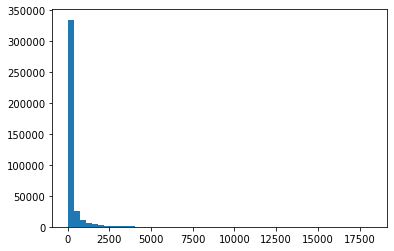

In [17]:
plt.hist(user_num['user_num'],bins=50)
plt.show()

In [111]:
train_df[(train_df['content_type_id'] == 0) & (train_df['content_id'] != train_df['bundle_id'])]['answered_correctly'].mean()

0.6493674771839443

In [112]:
train_df[(train_df['content_type_id'] == 0)]['answered_correctly'].mean()

0.657406587216255

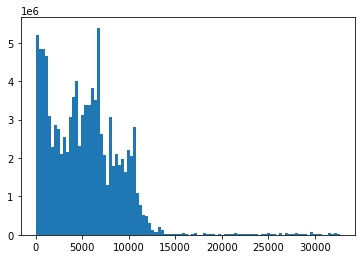

In [89]:
plt.hist(train_df['content_id'],bins=100)
plt.show()

In [ ]:
train_df.

In [122]:
# train_df[train_df['user_id'] == 115]

In [113]:
train_df['part'].value_counts()

5    42436724
2    19383726
6    11097180
3     8870972
4     8368943
1     7907737
7     5235994
Name: part, dtype: int64

In [119]:
train_df[train_df['prior_question_elapsed_time'].isnull()]['part'].value_counts()

5    1452037
2     459081
1     437936
6     312628
4     202821
3     176836
7      80040
Name: part, dtype: int64

In [121]:
train_df[(train_df['prior_question_elapsed_time'].isnull()) & (train_df['content_type_id'] == 0)]['answered_correctly'].mean()

0.6792028791107557

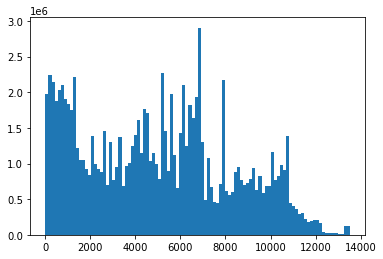

In [96]:
plt.hist(train_df[(train_df['content_type_id'] == 0)]['content_id'],bins=100)
plt.show()

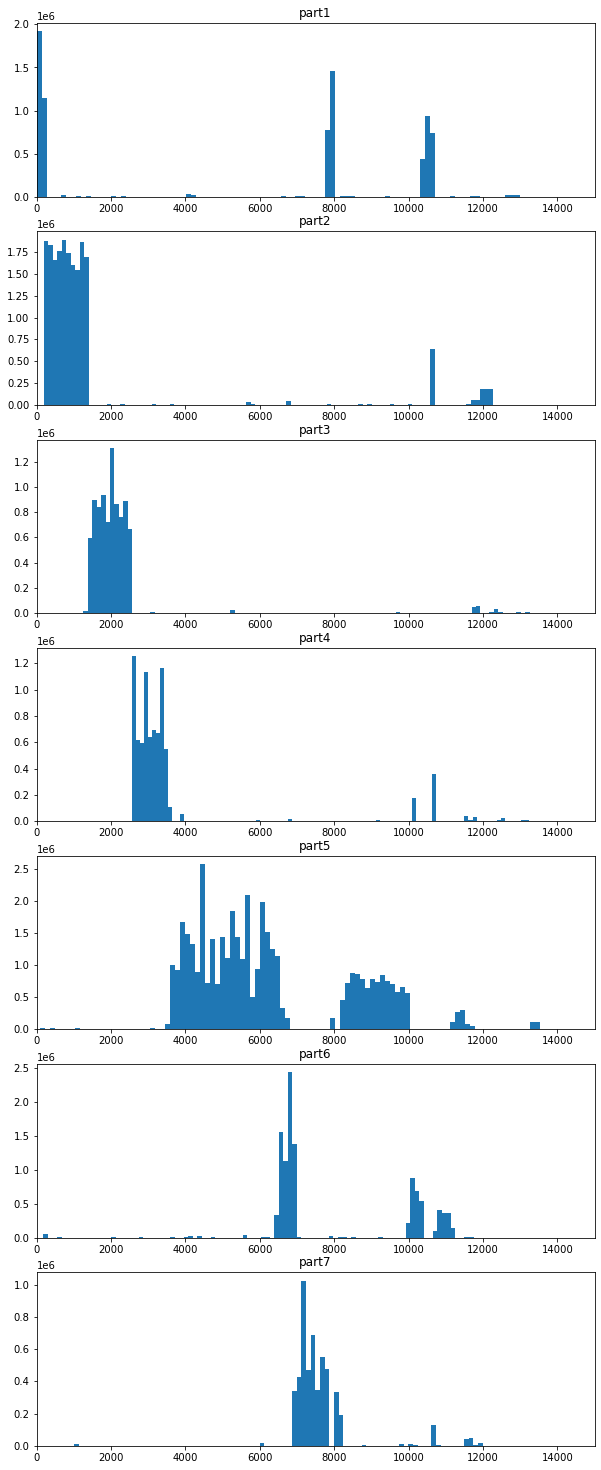

In [107]:
plt.figure(figsize=(10,30))
for part in range(1,8):
    plt.subplot(8,1,part)
    plt.xlim(0, 15000)
    plt.title(f'part{part}')
    plt.hist(train_df[(train_df['content_type_id'] == 0) & (train_df['part'] == part)]['content_id'],bins=100)
plt.show()

In [99]:
train_df[(train_df['content_type_id'] == 0) & (train_df['content_id'] <500)]['part'].value_counts()

2    4577040
1    3065960
5      47060
6      47047
Name: part, dtype: int64

In [ ]:
train_df[(train_df['content_type_id'] == 0) & (train_df['content_id'] <500)]['part'].value_counts()

In [65]:
train_df[train_df['user_id'] == 115]['content_id'].value_counts()

100     2
185     2
7926    2
7897    1
2063    1
156     1
7898    1
25      1
7896    1
7900    1
5716    1
2065    1
2064    1
7962    1
7927    1
7948    1
7882    1
50      1
57      1
6       1
4       1
151     1
7859    1
7901    1
172     1
3363    1
175     1
7876    1
5692    1
7863    1
55      1
7860    1
51      1
7922    1
7984    1
45      1
1278    1
108     1
152     1
3364    1
104     1
167     1
183     1
3365    1
7971    1
128     1
Name: content_id, dtype: int64

In [67]:
FEATURES_LIST = ['BASE','USER_ID','PART','USER_PART','CONTENT','TAGS','USER_READING_PART','TYPE_OF','USER_TYPE_OF','USER_ID_LECTURE','LECTURE_COUNT']

In [70]:
trains = [pd.read_feather(f'../features/mini_data/{feature}_train.feather') for feature in FEATURES_LIST]
train = pd.concat(trains,axis=1)

In [71]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,answered_correctly_avg_user,answered_correctly_sum_user,count_user,answered_correctly_avg_part,reading_part,answered_correctly_avg_reading_part,answered_correctly_avg_user_part,answered_correctly_sum_user_part,count_user_part,answered_correctly_avg_content,answered_correctly_sum_content,content_num,answered_correctly_avg_tags1,answered_correctly_avg_user_reading_part,answered_correctly_sum_user_reading_part,count_user_reading_part,answered_correctly_avg_type_of,answered_correctly_avg_user_type_of,answered_correctly_sum_user_type_of,count_user_type_of,lecture_count,lecture_part1_count,lecture_part2_count,lecture_part3_count,lecture_part4_count,lecture_part5_count,lecture_part6_count,lecture_part7_count,lecture_part1_count_cut,answered_correctly_avg_lecture_count_part1,lecture_part2_count_cut,answered_correctly_avg_lecture_count_part2,lecture_part3_count_cut,answered_correctly_avg_lecture_count_part3,lecture_part4_count_cut,answered_correctly_avg_lecture_count_part4,lecture_part5_count_cut,answered_correctly_avg_lecture_count_part5,lecture_part6_count_cut,answered_correctly_avg_lecture_count_part6,lecture_part7_count_cut,answered_correctly_avg_lecture_count_part7
0,8511,0,44331,5542,0,0,1,0,NaN,NaN,5542.0,3.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,0,0,0.602282,1,0.617223,NaN,0,0,0.752778,271,360,0.607741,NaN,0,0,0.647069,NaN,0,0,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
1,8512,35028,44331,5697,0,1,2,0,44000.0,0.0,5697.0,0.0,5,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.000000,0,1,0.602282,1,0.617223,0.000000,0,1,0.579035,348,601,0.695563,0.000000,0,1,0.647069,0.000000,0,1,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
2,8513,61706,44331,5748,0,2,3,1,32000.0,0.0,5748.0,3.0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.000000,0,2,0.602282,1,0.617223,0.000000,0,2,0.623457,303,486,0.610308,0.000000,0,2,0.647069,0.000000,0,2,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
3,8514,85685,44331,376,0,3,0,0,24000.0,0.0,376.0,1.0,2,62 90 100 38 102,62.0,90.0,100.0,38.0,102.0,NaN,NaN,None,NaN,0.333333,1,3,0.701379,0,0.686168,NaN,0,0,0.670373,1869,2788,0.735485,NaN,0,0,0.647069,0.333333,1,3,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
4,8515,141228,44331,5597,0,4,3,1,21000.0,0.0,5597.0,3.0,5,64,64.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.250000,1,4,0.602282,1,0.617223,0.333333,1,3,0.828957,1168,1409,0.610358,0.333333,1,3,0.647069,0.250000,1,4,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712


In [77]:
valids = [pd.read_feather(f'../features/mini_data/{feature}_valid.feather') for feature in FEATURES_LIST]
valid = pd.concat(valids,axis=1)

In [82]:
valid[valid['user_id'].isin(train['user_id'].unique())]['user_id'].nunique()

9130

In [85]:
train[train['user_id'] == 44331]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,answered_correctly_avg_user,answered_correctly_sum_user,count_user,answered_correctly_avg_part,reading_part,answered_correctly_avg_reading_part,answered_correctly_avg_user_part,answered_correctly_sum_user_part,count_user_part,answered_correctly_avg_content,answered_correctly_sum_content,content_num,answered_correctly_avg_tags1,answered_correctly_avg_user_reading_part,answered_correctly_sum_user_reading_part,count_user_reading_part,answered_correctly_avg_type_of,answered_correctly_avg_user_type_of,answered_correctly_sum_user_type_of,count_user_type_of,lecture_count,lecture_part1_count,lecture_part2_count,lecture_part3_count,lecture_part4_count,lecture_part5_count,lecture_part6_count,lecture_part7_count,lecture_part1_count_cut,answered_correctly_avg_lecture_count_part1,lecture_part2_count_cut,answered_correctly_avg_lecture_count_part2,lecture_part3_count_cut,answered_correctly_avg_lecture_count_part3,lecture_part4_count_cut,answered_correctly_avg_lecture_count_part4,lecture_part5_count_cut,answered_correctly_avg_lecture_count_part5,lecture_part6_count_cut,answered_correctly_avg_lecture_count_part6,lecture_part7_count_cut,answered_correctly_avg_lecture_count_part7
0,8511,0,44331,5542,0,0,1,0,NaN,NaN,5542.0,3.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,0,0,0.602282,1,0.617223,NaN,0,0,0.752778,271,360,0.607741,NaN,0,0,0.647069,NaN,0,0,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
1,8512,35028,44331,5697,0,1,2,0,44000.0,0.0,5697.0,0.0,5,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.000000,0,1,0.602282,1,0.617223,0.000000,0,1,0.579035,348,601,0.695563,0.000000,0,1,0.647069,0.000000,0,1,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
2,8513,61706,44331,5748,0,2,3,1,32000.0,0.0,5748.0,3.0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.000000,0,2,0.602282,1,0.617223,0.000000,0,2,0.623457,303,486,0.610308,0.000000,0,2,0.647069,0.000000,0,2,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
3,8514,85685,44331,376,0,3,0,0,24000.0,0.0,376.0,1.0,2,62 90 100 38 102,62.0,90.0,100.0,38.0,102.0,NaN,NaN,None,NaN,0.333333,1,3,0.701379,0,0.686168,NaN,0,0,0.670373,1869,2788,0.735485,NaN,0,0,0.647069,0.333333,1,3,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
4,8515,141228,44331,5597,0,4,3,1,21000.0,0.0,5597.0,3.0,5,64,64.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.250000,1,4,0.602282,1,0.617223,0.333333,1,3,0.828957,1168,1409,0.610358,0.333333,1,3,0.647069,0.250000,1,4,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,8800,4661010350,44331,6099,0,193,1,1,27000.0,1.0,6099.0,1.0,5,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.584775,169,289,0.602282,1,0.617223,0.639344,39,61,0.662541,1017,1535,0.598060,0.554455,56,101,0.647069,0.580420,166,286,5,1,0,0,0,2,2,0,1,0.676222,0,0.620921,0,0.629843,0,0.624334,1,0.669280,1,0.676810,0,0.641712
290,8801,4661039349,44331,10394,0,194,2,1,51000.0,1.0,10394.0,2.0,1,131 5 38,131.0,5.0,38.0,NaN,NaN,NaN,NaN,None,NaN,0.586207,170,290,0.728872,0,0.686168,0.709677,44,62,0.787234,370,470,0.789667,0.601064,113,188,0.647069,0.581882,167,287,5,1,0,0,0,2,2,0,1,0.676222,0,0.620921,0,0.629843,0,0.624334,1,0.669280,1,0.676810,0,0.641712
291,8802,4661118198,44331,1404,0,195,0,1,20000.0,1.0,1403.0,0.0,3,136 38 29,136.0,38.0,29.0,NaN,NaN,NaN,NaN,None,NaN,0.587629,171,291,0.691563,0,0.686168,0.543860,31,57,0.777328,

In [84]:
train[train['answered_correctly_avg_user_reading_part'].isnull()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of,answered_correctly_avg_user,answered_correctly_sum_user,count_user,answered_correctly_avg_part,reading_part,answered_correctly_avg_reading_part,answered_correctly_avg_user_part,answered_correctly_sum_user_part,count_user_part,answered_correctly_avg_content,answered_correctly_sum_content,content_num,answered_correctly_avg_tags1,answered_correctly_avg_user_reading_part,answered_correctly_sum_user_reading_part,count_user_reading_part,answered_correctly_avg_type_of,answered_correctly_avg_user_type_of,answered_correctly_sum_user_type_of,count_user_type_of,lecture_count,lecture_part1_count,lecture_part2_count,lecture_part3_count,lecture_part4_count,lecture_part5_count,lecture_part6_count,lecture_part7_count,lecture_part1_count_cut,answered_correctly_avg_lecture_count_part1,lecture_part2_count_cut,answered_correctly_avg_lecture_count_part2,lecture_part3_count_cut,answered_correctly_avg_lecture_count_part3,lecture_part4_count_cut,answered_correctly_avg_lecture_count_part4,lecture_part5_count_cut,answered_correctly_avg_lecture_count_part5,lecture_part6_count_cut,answered_correctly_avg_lecture_count_part6,lecture_part7_count_cut,answered_correctly_avg_lecture_count_part7
0,8511,0,44331,5542,0,0,1,0,NaN,NaN,5542.0,3.0,5,96,96.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,0,0,0.602282,1,0.617223,NaN,0,0,0.752778,271,360,0.607741,NaN,0,0,0.647069,NaN,0,0,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
3,8514,85685,44331,376,0,3,0,0,24000.0,0.0,376.0,1.0,2,62 90 100 38 102,62.0,90.0,100.0,38.0,102.0,NaN,NaN,None,NaN,0.333333,1,3,0.701379,0,0.686168,NaN,0,0,0.670373,1869,2788,0.735485,NaN,0,0,0.647069,0.333333,1,3,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
294,8835,0,46886,5059,0,0,1,1,NaN,NaN,5059.0,1.0,5,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,0,0,0.602282,1,0.617223,NaN,0,0,0.591304,68,115,0.610308,NaN,0,0,0.647069,NaN,0,0,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
295,8836,13010696,46886,1207,0,1,0,0,19000.0,0.0,1207.0,1.0,2,2 107 162 38 102,2.0,107.0,162.0,38.0,102.0,NaN,NaN,None,NaN,1.000000,1,1,0.701379,0,0.686168,NaN,0,0,0.577268,1158,2006,0.682942,NaN,0,0,0.647069,1.000000,1,1,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
324,16578,0,146403,7900,0,0,0,1,NaN,NaN,7900.0,0.0,1,131 93 81,131.0,93.0,81.0,NaN,NaN,NaN,NaN,None,NaN,NaN,0,0,0.728872,0,0.686168,NaN,0,0,0.824937,20027,24277,0.789667,NaN,0,0,0.647069,NaN,0,0,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684452,101221820,598231992,2147261668,4492,0,8,2,1,28666.0,0.0,4492.0,2.0,5,80,80.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.687500,11,16,0.602282,1,0.617223,NaN,0,0,0.451518,10100,22369,0.551976,NaN,0,0,0.647069,0.687500,11,16,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
8684536,101228510,0,2147447441,7900,0,0,0,1,NaN,NaN,7900.0,0.0,1,131 93 81,131.0,93.0,81.0,NaN,NaN,NaN,NaN,None,NaN,NaN,0,0,0.728872,0,0.686168,NaN,0,0,0.824937,20027,24277,0.789667,NaN,0,0,0.647069,NaN,0,0,0,0,0,0,0,0,0,0,0,0.625019,0,0.620921,0,0.629843,0,0.624334,0,0.607119,0,0.624098,0,0.641712
8684552,101228526,307009,2147447441,4492,0,8,3,0,16333.0,0.0,4492.0,2.0,5,80,80.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.312500,5,16,0.602282,1,0.617223,NaN,0,0,0.451518,10100,22369,0.551976,NaN,0,0,0.647069,0.312500,5,16,0,0,0,0,0,0,0,0,0,

In [78]:
train['content_id']

row_id
0
0
timestamp
0
0
user_id
0
0
content_id
0
0
content_type_id
0
0
task_container_id
0
0
user_answer
0
0
answered_correctly
0
0
prior_question_elapsed_time
52522
11211
prior_question_had_explanation
52522
11211
bundle_id
115975
32544
correct_answer
115975
32544
part
0
0
tags
115975
32544
tags1
115975
32544
tags2
4251311
1241969
tags3
4518542
1320482
tags4
6408560
1838873
tags5
7836725
2247490
tags6
8605013
2462531
tag
8568610
2452951
type_of
8568610
2452951
l_type_of
8568610
2452951
answered_correctly_avg_user
52355
11179
answered_correctly_sum_user
0
0
count_user
0
0
answered_correctly_avg_part
0
0
reading_part
0
0
answered_correctly_avg_reading_part
0
0
answered_correctly_avg_user_part
252157
55608
answered_correctly_sum_user_part
0
0
count_user_part
0
0
answered_correctly_avg_content
0
1
answered_correctly_sum_content
0
1
content_num
0
1
answered_correctly_avg_tags1
115975
32544
answered_correctly_avg_user_reading_part
100609
21590
answered_correctly_sum_user_reading_part
0
0
c

In [21]:
train_df[train_df['content_type_id'] == 1].head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
92,89,653762,2746,6808,1,14,-1,-1,NaN,False,6804.0,1.0,6,27,27,None,None,None,None,None,NaN,NaN,NaN
93,89,653762,2746,6808,1,14,-1,-1,NaN,False,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,intention,1.0
123,117,10183847,5382,16736,1,21,-1,-1,NaN,False,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,concept,0.0
220,212,1424348597,5382,30207,1,104,-1,-1,NaN,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,concept,0.0
224,216,1425557777,5382,18545,1,121,-1,-1,NaN,False,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,concept,0.0


In [20]:
train_df[train_df['user_id'] == 372519499]['answered_correctly'][-1000:].mean()

0.744

In [37]:
lecture_part1_num_dict_list = [defaultdict(int) for _ in range(8)]

In [40]:
lecture_part1_num_dict_list

[defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {}),
 defaultdict(int, {})]

In [36]:
row[2]

2

In [23]:
from collections import defaultdict
dd = defaultdict(int)

In [30]:
def f(dd2):
    dd2[10] = 2

In [31]:
f(dd)

In [32]:
dd

defaultdict(int, {10: 2})

In [14]:
train_df['bundle_id'].nunique()

4058

In [16]:
train_df['bundle_id'].value_counts()

10688.0    701034
7216.0     641198
2064.0     528129
3364.0     517722
2946.0     502766
            ...  
3670.0         72
7848.0         58
3578.0         58
7548.0         34
1484.0          3
Name: bundle_id, Length: 4058, dtype: int64

In [ ]:
cols = ['tag1','tag2','bundle_id',['bundle_id','tag1'],'task_container_id']
for col in cols:
    

In [105]:
train_df[(train_df['prior_question_had_explanation'] != 0) & ((train_df['prior_question_had_explanation'] != 1))]['part'].value_counts()

5    225622
1    166041
2      2265
6       844
4       202
3        76
7        72
Name: part, dtype: int64

In [97]:
train_df['user_id'].value_counts()[10001:10002]

363123680    2047
Name: user_id, dtype: int64

In [31]:
train_df.loc[train_df['prior_question_had_explanation'] == False , 'prior_question_had_explanation'] = 0
train_df.loc[train_df['prior_question_had_explanation'] == True , 'prior_question_had_explanation'] = 1

In [98]:
train_df[(train_df['user_id'] == 363123680)]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
17255939,16907856,0,363123680,175,0,0,0,0,NaN,None,175.0,2.0,1,9 10 92,9,10,92,None,None,None,NaN,NaN,NaN
17255940,16907857,38157,363123680,1278,0,2,3,1,23000.0,0,1278.0,3.0,2,143 140 81 29,143,140,81,29,None,None,NaN,NaN,NaN
17255941,16907858,131112,363123680,2063,0,3,3,0,35000.0,0,2064.0,0.0,3,136 92 29,136,92,29,None,None,None,NaN,NaN,NaN
17255942,16907859,131112,363123680,2065,0,3,1,0,35000.0,0,2064.0,2.0,3,136 162 92 29,136,162,92,29,None,None,NaN,NaN,NaN
17255943,16907860,131112,363123680,2064,0,3,2,0,35000.0,0,2064.0,1.0,3,157 92 29,157,92,29,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17257981,16909846,46741157917,363123680,11481,0,1703,3,1,47000.0,1,11480.0,3.0,5,64,64,None,None,None,None,None,NaN,NaN,NaN
17257982,16909847,46741249869,363123680,8174,0,1704,2,1,31000.0,1,8176.0,2.0,5,134,134,None,None,None,None,None,NaN,NaN,NaN
17257983,16909848,46741288225,363123680,8461,0,1705,1,0,17000.0,1,8464.0,3.0,5,72,72,None,None,None,None,None,NaN,NaN,NaN
17257984,16909848,46741288225,363123680,8461,0,1705,1,0,17000.0,1,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,concept,0.0


In [99]:
train_df[(train_df['user_id'] == 363123680)][['part','answered_correctly']].groupby('part').mean()

,answered_correctly
part,
1,0.404959
2,0.529551
3,0.489362
4,0.500000
5,0.577281
6,0.600000
7,0.291667


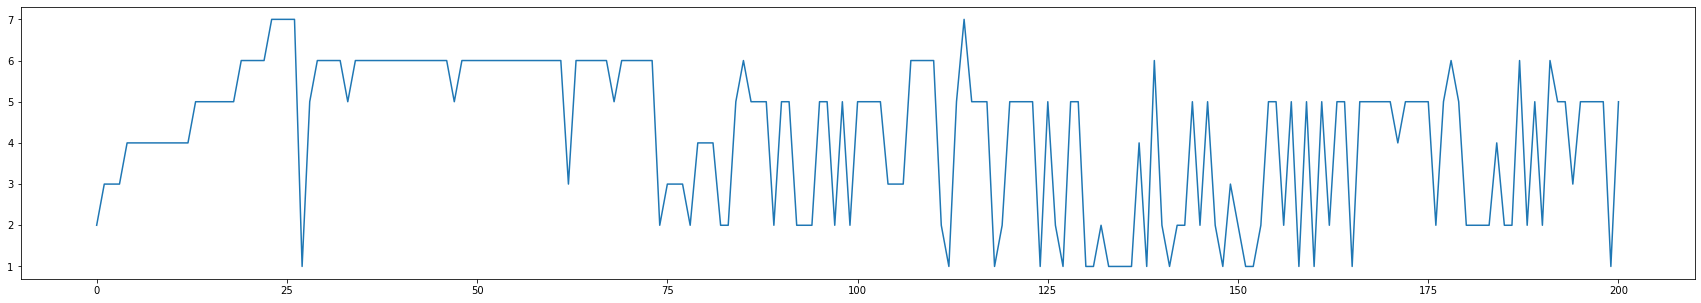

In [100]:
plt.figure(figsize=(30,5))
# plt.plot(train_df[(train_df['user_id'] == 455973631)]['prior_question_had_explanation'][:300])
plt.plot(train_df[(train_df['user_id'] == 363123680) & (train_df['prior_question_had_explanation'] == 0)]['part'].reset_index(drop=True))
plt.show()

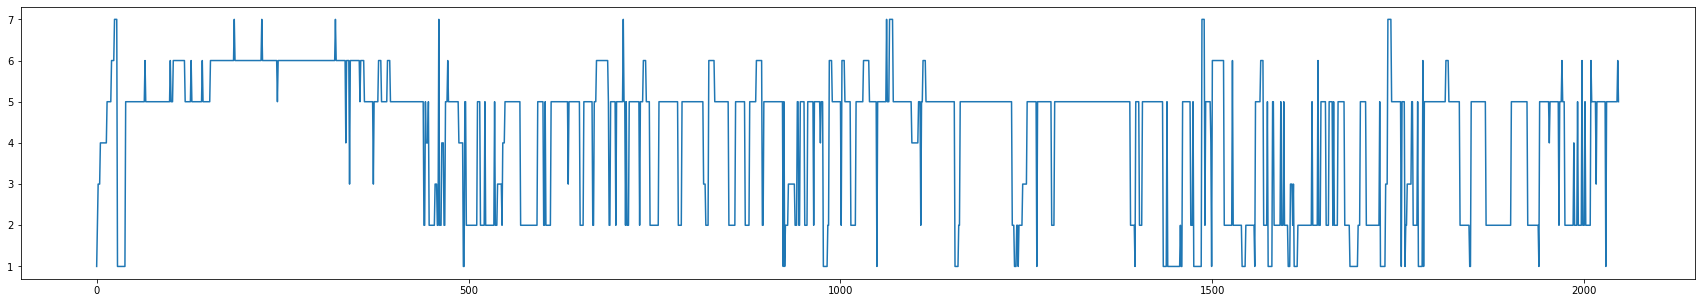

In [101]:
plt.figure(figsize=(30,5))
plt.plot(train_df[(train_df['user_id'] == 363123680)]['part'].reset_index(drop=True))
plt.show()

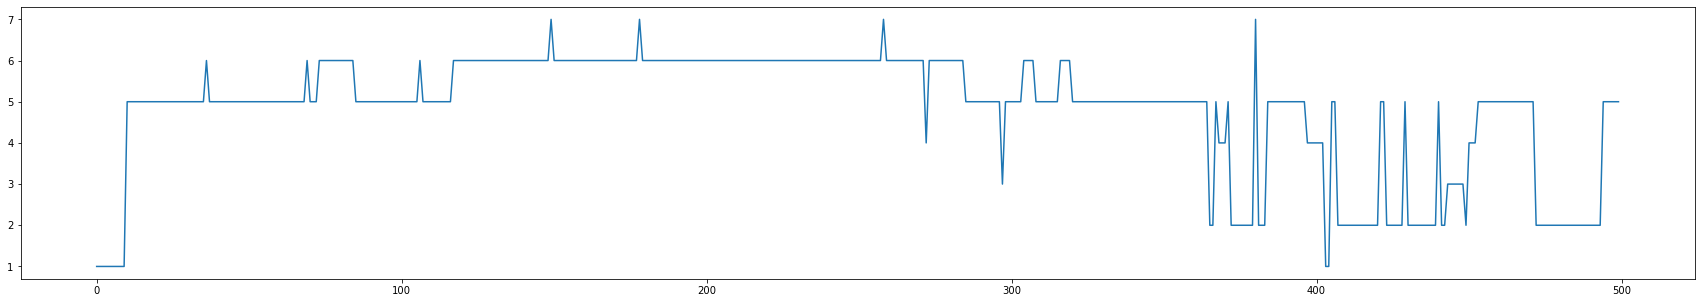

In [102]:
plt.figure(figsize=(30,5))
# plt.plot(train_df[(train_df['user_id'] == 455973631)]['prior_question_had_explanation'][:300])
plt.plot(train_df[(train_df['user_id'] == 363123680) & (train_df['prior_question_had_explanation'] == 1)]['part'][:500].reset_index(drop=True))
plt.show()

In [60]:
train_df[(train_df['user_id'] == 455973631) & (train_df['prior_question_had_explanation'] == 1)]['part'].value_counts()

3    4221
2    3378
5    2951
6    2554
4    2273
1     583
7     377
Name: part, dtype: int64

In [11]:
train_df = train_df[train_df['answered_correctly'] != -1]

In [12]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
0,0,0,115,5692,0,1,3,1,NaN,None,5692.0,3.0,5,151,151,None,None,None,None,None,NaN,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716.0,2.0,5,168,168,None,None,None,None,None,NaN,NaN,NaN
2,2,118363,115,128,0,0,0,1,55000.0,False,128.0,0.0,1,131 149 92,131,149,92,None,None,None,NaN,NaN,NaN
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860.0,0.0,1,131 104 81,131,104,81,None,None,None,NaN,NaN,NaN
4,4,137965,115,7922,0,4,1,1,11000.0,False,7920.0,1.0,1,131 149 92,131,149,92,None,None,None,NaN,NaN,NaN


In [13]:
few_content = train_df['content_id'].value_counts().sort_values().head(30).index.values

In [14]:
train_df[train_df['content_id'].isin(few_content)]['part'].value_counts()

7    224
5    124
6      5
3      3
Name: part, dtype: int64

In [15]:
train_df['part'].value_counts()

5    41210309
2    18926910
6    10785396
3     8694212
4     8166324
1     7635842
7     5156026
Name: part, dtype: int64

In [17]:
for i in range(1,8):
    print(f'part{i}')
    print(train_df[train_df['part'] == i]['content_id'].nunique())

part1
1015
part2
1664
part3
1568
part4
1449
part5
5547
part6
1236
part7
1173


In [18]:
train_df[train_df['content_id'].isin(few_content)]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tags1,tags2,tags3,tags4,tags5,tags6,tag,type_of,l_type_of
744545,729633,1032782533,15375317,4618,0,274,1,1,18000.0,True,4616.0,1.0,5,79,79,None,None,None,None,None,NaN,NaN,NaN
3256736,3190666,2046332289,68437470,7139,0,251,2,1,127250.0,True,7136.0,2.0,7,18 16 21,18,16,21,None,None,None,NaN,NaN,NaN
3256737,3190667,2046332289,68437470,7137,0,251,0,1,127250.0,True,7136.0,0.0,7,118 16 21,118,16,21,None,None,None,NaN,NaN,NaN
3256738,3190668,2046332289,68437470,7138,0,251,2,1,127250.0,True,7136.0,2.0,7,145 16 21,145,16,21,None,None,None,NaN,NaN,NaN
4585479,4492995,3610286625,94962323,4741,0,780,0,1,11000.0,True,4740.0,0.0,5,8,8,None,None,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101716399,99676695,1640088301,2116187045,3572,0,1626,0,1,15000.0,True,3572.0,0.0,5,8,8,None,None,None,None,None,NaN,NaN,NaN
101716621,99676913,1702711594,2116187045,4656,0,1801,0,1,7000.0,True,4656.0,0.0,5,79,79,None,None,None,None,None,NaN,NaN,NaN
101716912,99677201,1812182261,2116187045,4741,0,2009,0,1,20000.0,True,4740.0,0.0,5,8,8,None,None,None,None,None,NaN,NaN,NaN
101717142,99677431,2084254766,2116187045,6236,0,2229,0,1,20000.0,True,6236.0,0.0,5,8,8,None,None,None,None,None,NaN,NaN,NaN


In [19]:
train_df[train_df['content_id'].isin(few_content)]['answered_correctly'].mean()

0.8230337078651685

In [22]:
content_id_ans = train_df[['content_id','answered_correctly']].groupby('content_id').mean()

In [25]:
content_id_ans.sort_values('answered_correctly')

,answered_correctly
content_id,
1485,0.000000
10007,0.000000
1484,0.000000
1486,0.000000
10062,0.091752
...,...
10006,1.000000
12809,1.000000
12806,1.000000


In [73]:
df = pd.DataFrame()
content_ids = []
content_mean = []
content_num = []
num = 100
for i in tqdm(range(0,num)):
    content_id = train_df['content_id'].value_counts().sort_values(ascending=False).index[i]
    content_ids.append(content_id)
    content_mean.append(train_df[train_df['content_id'] == content_id]['answered_correctly'].mean())

df['content_id'] = content_ids
df['ans_mean'] = content_mean
df['num'] = train_df['content_id'].value_counts().sort_values(ascending=False).iloc[:num].values

In [74]:
train_df['content_id'].value_counts().sort_values(ascending=False)

10688    253996
6116     213605
6173     202106
4120     199372
175      195861
          ...  
10005         1
5823          1
1485          1
1484          1
1486          1
Name: content_id, Length: 13523, dtype: int64

In [76]:
train_df[['content_id','answered_correctly']].groupby('content_id').mean().reset_index()

,content_id,answered_correctly
0,0,0.907721
1,1,0.890646
2,2,0.554281
3,3,0.779437
4,4,0.613215
...,...,...
13518,13518,0.786866
13519,13519,0.571429
13520,13520,0.672474
13521,13521,0.808046


In [84]:
df = pd.DataFrame(train_df['content_id'].value_counts().sort_values(ascending=False)).reset_index()

In [85]:
df.columns = ['content_id','num']

In [87]:
df2 = train_df[['content_id','answered_correctly']].groupby('content_id').mean().reset_index()

In [89]:
df = pd.merge(df,df2,on='content_id',how='left')

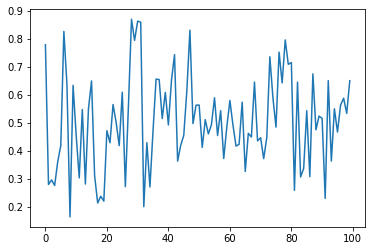

In [94]:
plt.plot(df['answered_correctly'].iloc[:100])

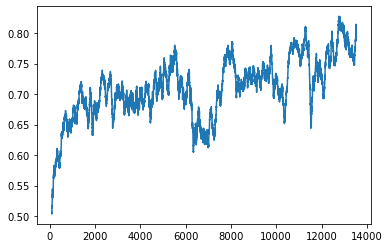

In [101]:
plt.plot(df['answered_correctly'].rolling(100).mean())
plt.show()

In [106]:
df.iloc[6200:7000]

,content_id,num,answered_correctly
6200,10827,5160,0.357171
6201,10830,5160,0.517636
6202,8902,5159,0.728823
6203,9197,5158,0.283637
6204,4649,5157,0.597246
...,...,...,...
6995,8427,4654,0.482381
6996,9369,4654,0.710572
6997,5235,4653,0.575113
6998,9673,4653,0.568450


In [110]:
qs_lc['content_id'].nunique()

13783

In [116]:
df = train_df[['content_id','answered_correctly']].groupby('content_id').mean()

In [118]:
df.columns = ['content_id_ans_mean']

In [124]:
df = train_df[train_df['user_id'].isin([115,2147482888])]
df = df[['user_id','answered_correctly','content_id']]
encoded = (df.groupby(['user_id','content_id'])['answered_correctly']
           .expanding().agg(['mean','sum']).groupby('content_id').shift(1))

# encoded = encoded.reset_index().sort_values('level_2').reset_index(drop=True)

In [133]:
encoded = encoded.reset_index().sort_values('level_2').reset_index(drop=True).fillna(0)

In [135]:
encoded.columns = ['user_id', 'content_id', 'level_2', 'content_id_user_mean', 'content_id_user_sum']

Index(['user_id', 'content_id', 'level_2', 'mean', 'sum'], dtype='object')

In [136]:
encoded

,user_id,content_id,level_2,mean,sum
0,115,5692,0,0.0,0.0
1,115,5716,1,0.0,0.0
2,115,128,2,0.0,0.0
3,115,7860,3,0.0,0.0
4,115,7922,4,0.0,0.0
...,...,...,...,...,...
72,2147482888,3586,103301271,0.0,0.0
73,2147482888,6341,103301272,0.0,0.0
74,2147482888,4212,103301273,0.0,0.0
75,2147482888,6343,103301274,0.0,0.0
